In [170]:
!pip install sympy


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [1]:
from sympy import symbols, diff, simplify, init_printing
init_printing()

# implicit function theorem dy_dx = - df_dx / df_dy

# Constant product
x, y, v = symbols("x y v")
f = x*y - v**2

df_dx = diff(f, x)
df_dy = diff(f, y)
dy_dx = -df_dx / df_dy

display(f)
display(dy_dx)

print(dy_dx)

-y/x


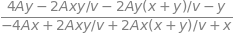

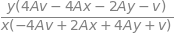

(4*A*y - 2*A*x*y/v - 2*A*y*(x + y)/v - y)/(-4*A*x + 2*A*x*y/v + 2*A*x*(x + y)/v + x)


In [2]:
from sympy import symbols, diff, simplify,  init_printing
init_printing()

# Curve
x, y, v, A = symbols("x y v A")
k = x*y/v**2
f = x*y + A*k*(x+y)*2*v - (v**2 + A*k*(2*v)**2)

df_dx = diff(f, x)
df_dy = diff(f, y)
dy_dx = -df_dx / df_dy

display(f)
display(dy_dx)
display(simplify(dy_dx))

print(dy_dx)

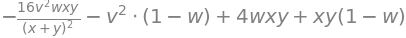

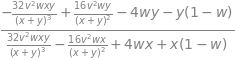

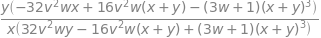

(-32*v**2*w*x*y/(x + y)**3 + 16*v**2*w*y/(x + y)**2 - 4*w*y - y*(1 - w))/(32*v**2*w*x*y/(x + y)**3 - 16*v**2*w*x/(x + y)**2 + 4*w*x + x*(1 - w))


In [3]:
from sympy import symbols, diff, simplify,  init_printing
init_printing()

# Lerp
x, y, w, v = symbols("x y w v")
g = 4*x*y/(x+y)**2
f = (1-w)*x*y + w*g*(x+y)**2 - ((1-w)*v**2 + w*g*(2*v)**2)

df_dx = diff(f, x)
df_dy = diff(f, y)
dy_dx = -df_dx / df_dy

display(f)
display(dy_dx)
display(simplify(dy_dx))

print(dy_dx)

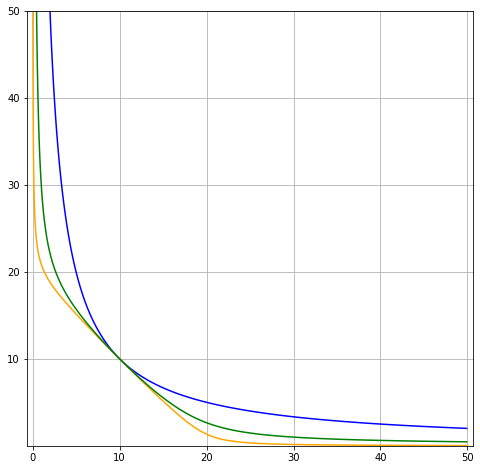

In [4]:
import numpy as np
import matplotlib.pyplot as plt

v = 10

# Curve v1 parameters
A = 10

# Lerp parameters
w = 0.5

xs = np.linspace(0.0001, 50, 100)
ys = np.linspace(0.0001, 50, 100)

x, y = np.meshgrid(xs, ys)

# Constant product
f_cp = x*y - v**2
# Curve v1
k = x*y/v**2
f_curve = x*y + A*k*(x+y)*2*v - (v**2 + A*k*(2*v)**2)
# Lerp
g = 4*x*y/(x+y)**2
f_lerp = (1-w)*x*y + w*g*(x+y)**2 - ((1-w)*v**2 + w*g*(2*v)**2)

plt.figure(figsize=(8, 8)) 
plt.axis('equal')

plt.contour(x, y, f_cp, levels=[0], colors='blue')
plt.contour(x, y, f_curve, levels=[0], colors='orange')
plt.contour(x, y, f_lerp, levels=[0], colors='green')

plt.grid(True)
plt.show()

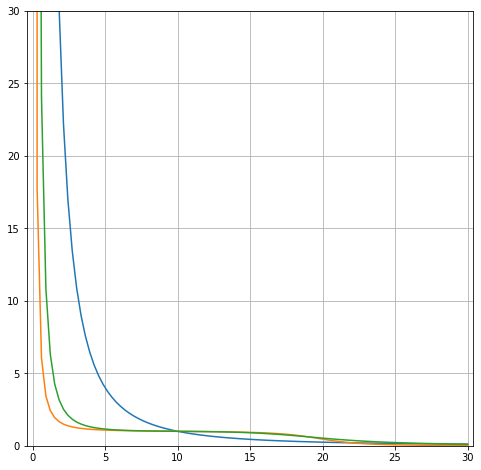

In [5]:
from scipy.optimize import fsolve

def f_cp(y, x, v):
    return x*y - v**2

def dy_dx_cp(x, y):
    return -y/x

def f_curve(y, x, A, v):
    k = x*y/v**2
    return x*y + A*k*(x+y)*2*v - (v**2 + A*k*(2*v)**2)
    
def dy_dx_curve(x, y):
    return (4*A*y - 2*A*x*y/v - 2*A*y*(x + y)/v - y)/(-4*A*x + 2*A*x*y/v + 2*A*x*(x + y)/v + x)

def f_lerp(y, x, w, v):
    g = 4*x*y/(x+y)**2
    return (1-w)*x*y + w*g*(x+y)**2 - ((1-w)*v**2 + w*g*(2*v)**2)

def dy_dx_lerp(x, y):
    return (-32*v**2*w*x*y/(x + y)**3 + 16*v**2*w*y/(x + y)**2 - 4*w*y - y*(1 - w))/(32*v**2*w*x*y/(x + y)**3 - 16*v**2*w*x/(x + y)**2 + 4*w*x + x*(1 - w))

xs = np.linspace(0.0001, 30, 100)

ys_cp = [fsolve(f_cp, v, args=(x, v))[0] for x in xs]
ps_cp = [-dy_dx_cp(x, y) for x, y in zip(xs, ys_cp)]

ys_curve = [fsolve(f_curve, v, args=(x, A, v))[0] for x in xs]
ps_curve = [-dy_dx_curve(x, y) for x, y in zip(xs, ys_curve)]

ys_lerp = [fsolve(f_lerp, v, args=(x, w, v))[0] for x in xs]
ps_lerp = [-dy_dx_curve(x, y) for x, y in zip(xs, ys_lerp)]

plt.figure(figsize=(8, 8)) 
plt.axis('equal')

# plt.plot(xs, ys)
plt.plot(xs, ps_cp)
plt.plot(xs, ps_curve)
plt.plot(xs, ps_lerp)

plt.xlim(0, 30)
plt.ylim(0, 30)
plt.grid(True)
plt.show()